In [ ]:
%pip install mp-api pymatgen matminer pandas scikit-learn matplotlib

%pip freeze > requirements.txt
%pip install -r requirements.txt


   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.5 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.5 MB 190.7 kB/s eta 0:00:27
   --- ------------------------------------ 0.5/5.5 MB 190.7 kB/s eta 0:00:27
   --- ---------


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from mp_api.client import MPRester
from pymatgen.core import Element
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


c:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
API_KEY = "n4VeRex2uzZ3j0mSztAco3xWB5wIKqf5"
mpr = MPRester(API_KEY)

data = mpr.materials.summary.search(
    band_gap=(0.1, None),
    deprecated=False,
    num_chunks=10,
    chunk_size=100
)

df_real = pd.DataFrame([d.model_dump() for d in data])



Retrieving SummaryDoc documents:   0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\mp_api\client\core\client.py:834: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'order

In [5]:

df_real.rename(columns={
    "band_gap": "Bandgap",
    "formation_energy_per_atom": "Formation Energy",
    "energy_above_hull": "Stability",
    "formula_pretty": "Formula",
    "density": "Density",
    "volume": "Volume"
}, inplace=True)


def mean_electronegativity(elements):
    try:
        return sum(Element(e).X for e in elements) / len(elements)
    except:
        return None

df_real["Mean Electronegativity"] = df_real["elements"].apply(mean_electronegativity)

df_real.dropna(subset=["Formation Energy", "Stability", "Density", "Volume", "Mean Electronegativity"], inplace=True)

print(f"Total materials after cleaning: {len(df_real)}")
df_real.head()



Total materials after cleaning: 1000


,builder_meta,nsites,elements,nelements,composition,composition_reduced,Formula,formula_anonymous,chemsys,Volume,...,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs,fields_not_requested,Mean Electronegativity
0,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",5,"[Ac, O]",2,"(Ac, O)","(Ac, O)",Ac2O3,A2B3,Ac-O,91.511224,...,None,None,None,None,"[O2-, Ac3+]","{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-31750']},[],2.270000
1,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",40,"[Ac, S]",2,"(Ac, S)","(Ac, S)",Ac2S3,A2B3,Ac-S,1118.407852,...,None,None,None,None,"[S2-, Ac3+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,{},[],1.840000
2,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",10,"[Ac, S]",2,"(Ac, S)","(Ac, S)",Ac2S3,A2B3,Ac-S,328.464893,...,None,None,None,None,"[S2-, Ac3+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,{},[],1.840000
3,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",5,"[Ac, Al, O]",3,"(Ac, Al, O)","(Ac, Al, O)",AcAlO3,ABC3,Ac-Al-O,57.451413,...,None,None,None,None,"[Al3+, O2-, Ac3+]","{'materials': True, 'thermo': True, 'xas': Fal...",True,{},[],2.050000
4,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",5,"[Ac, B, O]",3,"(Ac, B, O)","(Ac, B, O)",AcBO3,ABC3,Ac-B-O,51.548126,...,None,None,None,None,"[O2-, B3+, Ac3+]","{'materials': True, 'thermo': True, 'xas': Fal...",True,{},[],2.193333


In [6]:

X = df_real[["Formation Energy", "Stability", "Density", "Volume", "Mean Electronegativity"]]
y = df_real["Bandgap"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (800, 5)
Testing features shape: (200, 5)


In [13]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
print("XGBoost model training completed!")

# Predict
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Predicted Bandgap values:", y_pred)
print("Actual Bandgap values:", y_test.values)
print("Mean Absolute Error (MAE):", mae)


XGBoost model training completed!
Predicted Bandgap values: [3.737263   3.673154   3.3363352  3.848436   0.88887686 2.7341857
 1.0008044  0.7707828  4.5198536  1.507208   5.047099   0.7910011
 1.8123661  1.0756471  4.1612434  1.3100792  0.32989192 3.3224258
 3.4506824  2.2653315  4.932514   0.46705294 2.3167887  0.2801708
 0.73236084 1.1983714  2.8476627  2.8949764  1.3216144  1.4196064
 2.6763098  1.2312325  3.9866347  0.40542355 3.1075723  2.2599206
 4.2569246  4.0431676  1.2274455  1.2222431  2.321901   1.9794104
 1.282786   4.2723346  0.84012437 0.43485978 2.7545485  4.2335863
 0.79909945 4.7618465  0.5152565  1.482728   1.2628831  3.8290756
 2.310988   0.4935434  3.05439    5.737234   1.3285518  2.0430799
 0.6315543  1.0695614  4.8525043  0.9858624  1.0278282  0.1882547
 5.265146   4.547754   2.4285464  4.2834873  1.4178071  0.8711128
 3.23212    3.6780627  1.2201668  0.38193482 1.859558   1.204683
 3.3375554  0.69277734 1.9716561  1.1780723  1.3217415  1.2897992
 3.116939   4.923

In [7]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)
print("Model training completed!")


Model training completed!


In [8]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Predicted Bandgap values:", y_pred)
print("Actual Bandgap values:", y_test.values)
print("Mean Absolute Error (MAE):", mae)


Predicted Bandgap values: [3.71506756 3.58102561 3.32146125 4.05172095 1.11688151 2.44920146
 1.0715369  0.98696295 4.36303259 1.29280072 4.69668955 0.7405496
 2.14525807 2.10895028 3.8347287  1.85441109 0.41991998 3.19398861
 3.58102561 2.25297692 4.84677197 0.81395731 2.81935959 1.08420932
 0.85170639 1.04923536 2.73565397 2.79222294 1.65315364 1.29531259
 2.14191971 0.82216933 3.06204325 0.45949525 2.78230535 2.90957051
 4.21672004 4.16524036 1.52584976 1.19545657 1.65256999 2.50803051
 1.33905338 4.3048079  0.82195394 0.85062075 1.73297179 3.72624607
 0.82062178 4.00469121 0.4620962  1.61301421 0.88865058 3.86571948
 2.42003235 0.76272319 2.55047308 5.4722112  1.5906079  1.76712459
 0.96099608 1.42061286 4.73769714 0.85170639 1.08617448 0.44264407
 4.45126115 4.20306625 2.45700042 4.36922788 1.17387969 0.94471479
 3.29645775 3.58102561 1.11772541 0.62776362 1.79878096 1.17080327
 3.7145858  0.86674703 1.46458044 1.42325397 1.16259391 1.12186649
 2.5426908  4.84677197 3.22002024 3.3

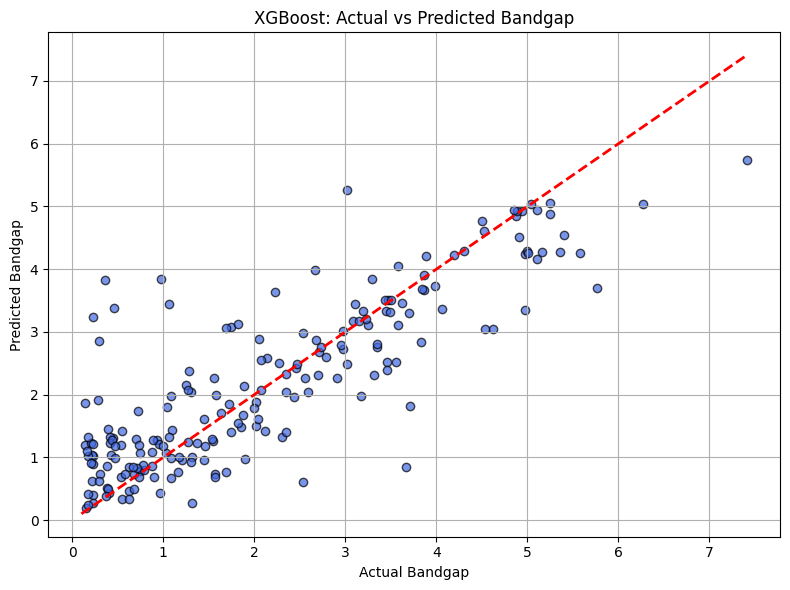

In [14]:
import matplotlib.pyplot as plt

# Plot predicted vs actual bandgap values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="royalblue", edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Actual Bandgap")
plt.ylabel("Predicted Bandgap")
plt.title("XGBoost: Actual vs Predicted Bandgap")
plt.grid(True)
plt.tight_layout()
plt.show()


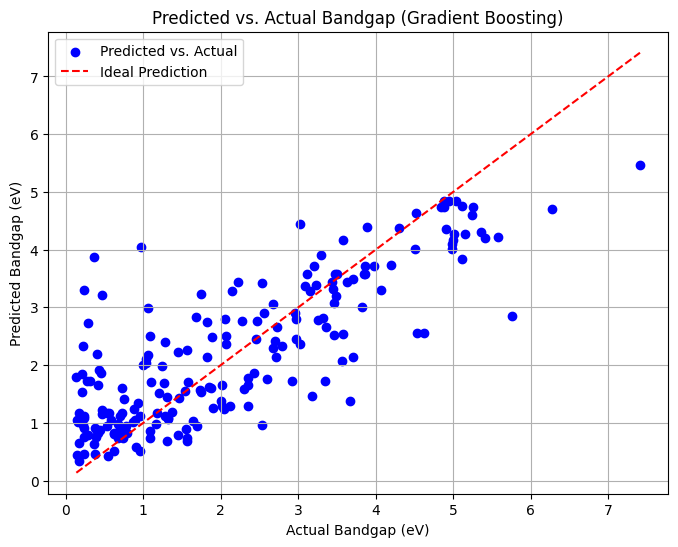

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Bandgap (eV)")
plt.ylabel("Predicted Bandgap (eV)")
plt.title("Predicted vs. Actual Bandgap (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.show()


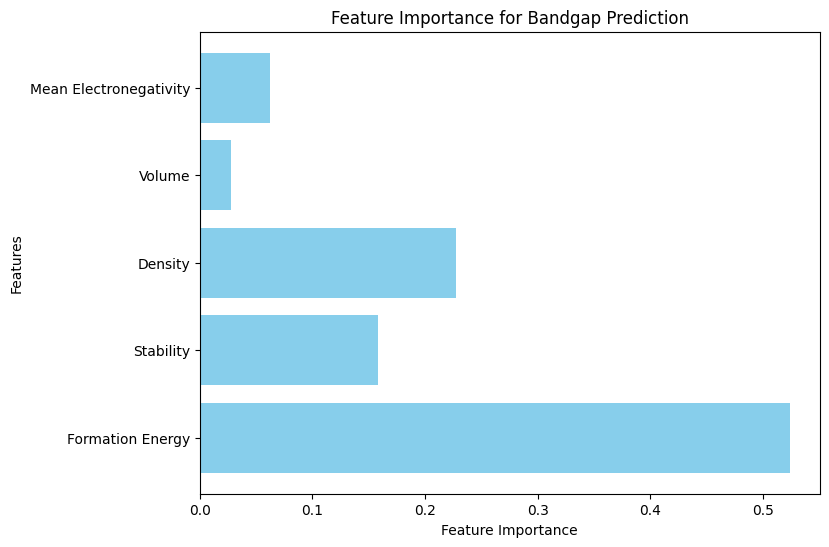

In [10]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Bandgap Prediction")
plt.show()
